In [22]:
import numpy as np


import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert, tf2zpk,sosfilt
from scipy.fftpack import fft



In [23]:
# Butterworth Bandpass Filter Design
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    
    if not (0 < lowcut < nyquist and 0 < highcut < nyquist):
        raise ValueError("Cutoff frequencies must be between 0 and the Nyquist frequency.")
    
    if highcut - lowcut < 1:  # Adjust threshold as needed for stability
        print("Warning: Narrow bandwidth detected. Consider lowering filter order.")
        order = min(order, 2)  # Reduce order for stability
    
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = butter(order, [low, high], btype='band', output='sos')

    return sos


def bandpass_filter(data, lowcut, highcut, fs, order=4):
    if np.any(np.isnan(data)) or np.any(np.isinf(data)):
        raise ValueError("Input data contains NaN or Inf values.")
    max_val = np.max(np.abs(data))

    if max_val > 1e6:  # Threshold for large amplitude signals
        print("Warning: Large signal amplitude detected. Normalizing input.")
        data = data / max_val
        b, a = butter_bandpass(lowcut, highcut, fs, order)
        return lfilter(b, a, data)*max_val

    sos = butter_bandpass(lowcut, highcut, fs, order)

    
    return sosfilt(sos, data)

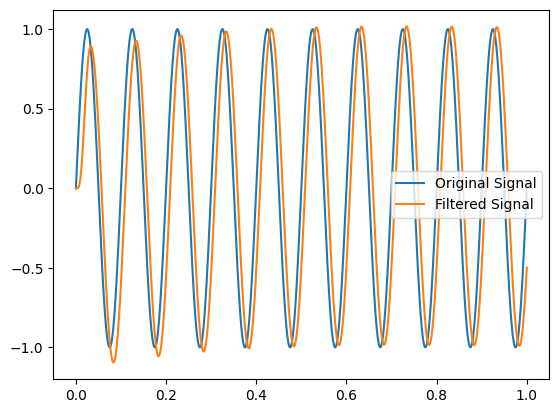

In [25]:
# Example test cases
fs = 48000  # Sampling rate in Hz
lowcut = 0.5  # Low cutoff frequency in Hz
highcut = 40  # High cutoff frequency in Hz
t = np.linspace(0, 1.0, fs)
signal = np.sin(2 * np.pi * 10 * t)  # Test signal at 10 Hz
# Apply filter
filtered_signal = bandpass_filter(signal, lowcut, highcut, fs)
#filtered_signal = filtered_signal[pad_length:-pad_length]
# Check for NaN
assert not np.any(np.isnan(filtered_signal)), "Filtered signal contains NaN values."

# Plot the result
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t, signal, label="Original Signal")
plt.plot(t, filtered_signal, label="Filtered Signal")
plt.legend()
plt.show()


In [21]:
nyquist = 0.5 * fs
print(nyquist)
order = 6
low = lowcut / nyquist
high = highcut / nyquist
print(low, high)
b, a = butter(order, [low, high], btype='band')

z, p, k = tf2zpk(b, a)
print(np.max(np.abs(p)))

24000.0
2.0833333333333333e-05 0.0016666666666666668
1.0767827786336877


c:\Users\joshu\OneDrive\Documents\Projects\heartmonitoring\heartmonitor\Lib\site-packages\scipy\signal\_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)
